In [64]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [65]:
df=pd.read_csv("./Resources/crypto_data.csv")

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1252 non-null   object 
 1   CoinName         1252 non-null   object 
 2   Algorithm        1252 non-null   object 
 3   IsTrading        1252 non-null   bool   
 4   ProofType        1252 non-null   object 
 5   TotalCoinsMined  744 non-null    float64
 6   TotalCoinSupply  1252 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 60.0+ KB


In [67]:
df.head(10)

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
6,2015,2015 coin,X11,True,PoW/PoS,NaN,0
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
9,LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [68]:
df.shape

(1252, 7)

In [69]:
crypto=df.loc[   
    
    df['IsTrading']==True
]

In [70]:
crypto.shape


(1144, 7)

In [71]:
#drop IsTrading Column
crypto = crypto.drop(labels='IsTrading', axis=1)
crypto.shape

(1144, 6)

In [14]:
#Remove all rows that have at least one null value.
crypto = crypto.dropna(how="any")
crypto.shape

(685, 6)

In [15]:
# Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.
crypto = crypto.loc[df['TotalCoinsMined']>0]
crypto.shape

(532, 6)

In [ ]:
#machine learning algorithm, its data should be numeric

In [16]:
#  delete the `CoinName` from the original dataframe
crypto = crypto.drop(labels='CoinName',axis=1)
crypto.shape

(532, 5)

In [17]:
#delete the unnamed column(unnecessary)
crypto = crypto.drop(labels='Unnamed: 0', axis=1)
crypto.shape

(532, 4)

In [18]:
crypto.head(10)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
9,Scrypt,PoW,6.303924e+07,84000000
10,X11,PoW/PoS,9.031294e+06,22000000
11,CryptoNight-V7,PoW,1.720114e+07,0
12,Ethash,PoW,1.133597e+08,210000000
13,Equihash,PoW,7.383056e+06,21000000


In [23]:
crypto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        532 non-null    object 
 1   ProofType        532 non-null    object 
 2   TotalCoinsMined  532 non-null    float64
 3   TotalCoinSupply  532 non-null    object 
dtypes: float64(1), object(3)
memory usage: 20.8+ KB


In [26]:
# convert the remaining features with text values, `Algorithm` and `ProofType`, into numerical dat
crypto=pd.get_dummies(data=crypto, columns=["Algorithm", "ProofType"])


In [32]:
#standardise the data
from sklearn.preprocessing import StandardScaler

crypto_scaled = StandardScaler().fit_transform(crypto)



In [36]:
type(crypto_scaled)

numpy.ndarray

In [33]:
# Examine the number of rows and columns of your dataset
crypto_scaled.shape

(532, 98)

In [37]:
crypto_scaled[0]

array([-0.11710817, -0.1528703 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.07530656, -0.0433963 , -0.06142951, -0.06142951,
       -0.0433963 , -0.0433963 , -0.19245009, -0.06142951, -0.09740465,
       -0.0433963 , -0.11547005, -0.07530656, -0.0433963 , -0.0433963 ,
       -0.15191091, -0.0433963 , -0.13118084, -0.0433963 , -0.0433963 ,
       -0.08703883, -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.0433963 , -0.08703883, -0.08703883, -0.08703883,
       -0.0433963 , -0.13118084, -0.13840913, -0.13840913, -0.0433963 ,
       -0.06142951, -0.0433963 , -0.07530656, -0.18168574, -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.07530656, -0.15826614, -0.31491833,
       -0.0433963 , -0.08703883, -0.07530656, -0.06142951,  1.38675049,
       -0.0433963 , -0.0433963 , -0.06142951, -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.39879994, -0.0433963 , -0.18168574, -0.04

In [39]:
crypto.iloc[:, 0]


0       4.199995e+01
2       1.055185e+09
5       2.927942e+10
7       1.792718e+07
8       1.076842e+08
            ...     
1238    2.000000e+09
1242    1.493105e+07
1245    9.802226e+08
1246    7.296538e+06
1247    1.283270e+05
Name: TotalCoinsMined, Length: 532, dtype: float64

# Perform dimensionality reduction with PCA



In [42]:
#Perform dimensionality reduction with PCA
# Initialize PCA model
pca = PCA(n_components=0.9)

# Get two principal components for the data.
Crypto_pca = pca.fit_transform(crypto_scaled)

Crypto_pca.shape

(532, 74)

In [56]:
from sklearn.manifold import TSNE
#reduce the dataset dimensions with t-SNE
tsne = TSNE(n_components=2, perplexity=25.0)

# Apply a fit-transform
tsne_features = tsne.fit_transform(Crypto_pca)
tsne_features.shape

C:\Users\User\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(532, 2)

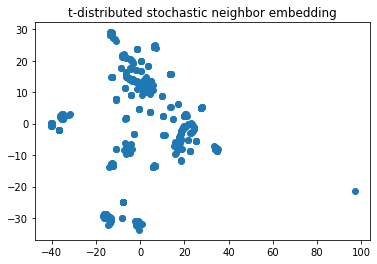

In [57]:
plt.scatter(x=tsne_features[:,0], y=tsne_features[:,1])
plt.title('t-distributed stochastic neighbor embedding')
plt.show()

# Cluster Analysis with k-Means

from sklearn.cluster import KMeans


In [61]:
from sklearn.cluster import KMeans
import numpy as np

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


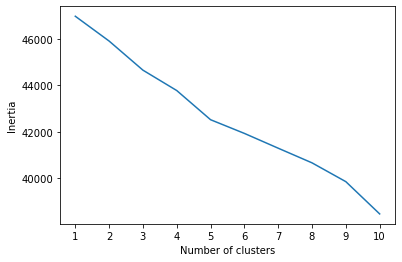

In [76]:
inertia = []
k_list = np.arange(1,11,1)

# Looking for the best k
for k in k_list:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(Crypto_pca)
    inertia.append(km.inertia_)

# Plot the Elbow Curve
plt.plot(k_list, inertia)
plt.xticks(k_list)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


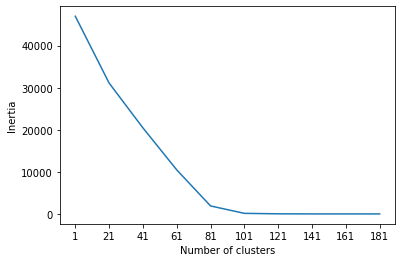

In [74]:
inertia = []
k_list = np.arange(1,201, 20)

# Looking for the best k
for k in k_list:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(Crypto_pca)
    inertia.append(km.inertia_)

# Plot the Elbow Curve
plt.plot(k_list, inertia)
plt.xticks(k_list)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()